1. Загрузить файл auto.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl
import io
import requests
import seaborn as sns
from scipy.stats import t
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df=pd.read_csv('auto.csv')
df[:3]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [3]:
for i in df.columns:
    print (f'{i}')
    if(df[i].dtype == np.float64 or df[i].dtype == np.int64):
        print('среднее:', statistics.mean(df[i]))
    print('медиана:',statistics.median(df[i]))
    print('мода:',sts.mode(df[i]).mode)
    print('минимум:',min(df[i]))
    print('максимум:',max(df[i]))
    print('стандартное отклонение:',max(df[i]))
    print(' ')




symboling
среднее: 0.8341463414634146
медиана: 1
мода: [0]
минимум: -2
максимум: 3
стандартное отклонение: 3
 
normalized-losses
среднее: 126.36585365853658
медиана: 122
мода: [161]
минимум: 65
максимум: 256
стандартное отклонение: 256
 
make
медиана: nissan
мода: ['toyota']
минимум: alfa-romero
максимум: volvo
стандартное отклонение: volvo
 
fuel-type
медиана: gas
мода: ['gas']
минимум: diesel
максимум: gas
стандартное отклонение: gas
 
aspiration
медиана: std
мода: ['std']
минимум: std
максимум: turbo
стандартное отклонение: turbo
 
num-of-doors
медиана: four
мода: ['four']
минимум: four
максимум: two
стандартное отклонение: two
 
body-style
медиана: sedan
мода: ['sedan']
минимум: convertible
максимум: wagon
стандартное отклонение: wagon
 
drive-wheels
медиана: fwd
мода: ['fwd']
минимум: 4wd
максимум: rwd
стандартное отклонение: rwd
 
engine-location
медиана: front
мода: ['front']
минимум: front
максимум: rear
стандартное отклонение: rear
 
wheel-base
среднее: 98.75658536585365
медиа

3. Рассчитать и визуализировать корреляционную матрицу для переменных.

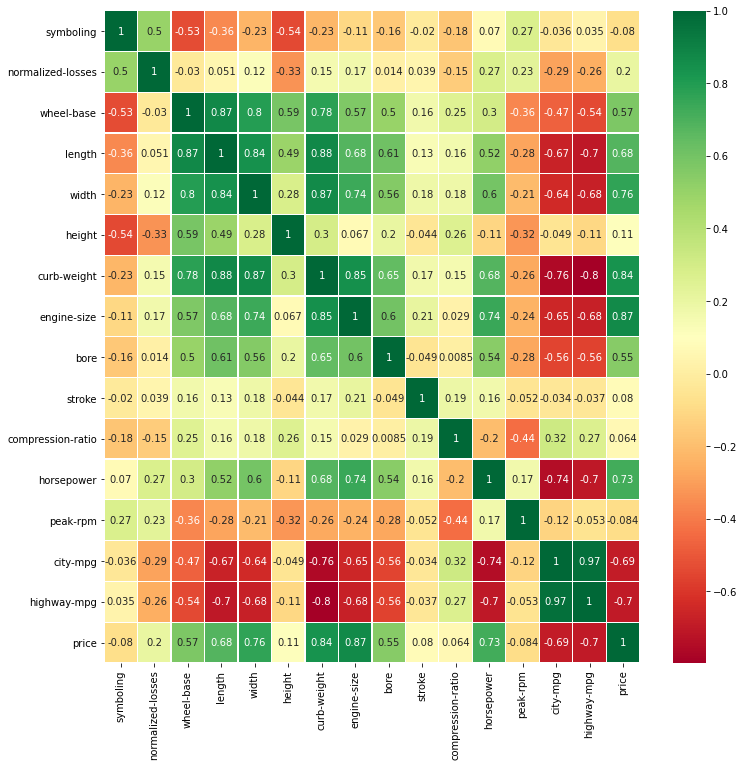

In [4]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

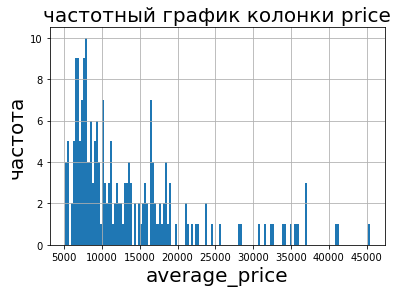

(array(0.), array(1.11111111), array(0.), array(0.375))

In [5]:
plt.hist(df['price'], bins=150)
plt.title('частотный график колонки price',fontsize=20,ha='center')
plt.xlabel('average_price',fontsize=20,ha='center')
plt.ylabel('частота',fontsize=20,ha='center')
plt.grid(True)
plt.show()
rv = t(df=20, loc=0, scale=1)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

5. Визуализировать несколько взаимосвязей между переменными

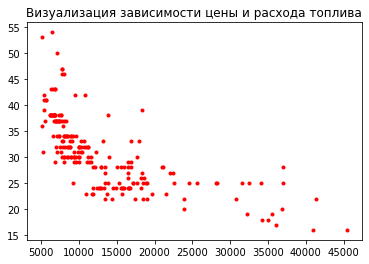

In [6]:
plt.plot(df['price'], df['highway-mpg'], 'r.')
plt.title('Визуализация зависимости цены и расхода топлива')
plt.show()

Очевидно, переменные отрицательно коррелируют; чем выше цена, тем ниже расход топлива и наоборот. 


Визуализация зависимости количества л\с и цены

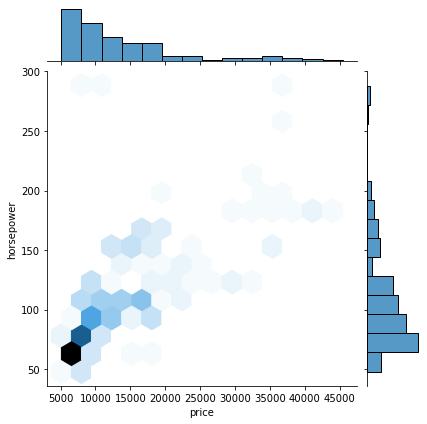

In [7]:
sns.jointplot(x = df['price'], y = df['horsepower'], data=df, kind='hex')

переменные коррелируют друг с другом

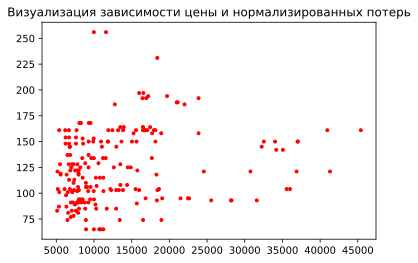

In [28]:
plt.plot(df['price'], df['normalized-losses'], 'r.')
plt.title('Визуализация зависимости цены и нормализированных потерь')
plt.show()

In [ ]:
Выборки слабо коррелириуют между собой, и возможно, если данных будет ещё больше, можно будет сделать вывод о том, что они не связаны между собой. 

6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

1. Нулевая гипотеза -- перменная "размер двигателя" статестически связана со значением переменной "лошадиные силы".

In [12]:
print(sts.ttest_ind(df['horsepower'], df['engine-size']))

Ttest_indResult(statistic=-4.961209879088472, pvalue=1.0303292625670404e-06)


p-value больше 0.05, следовательно, нулевую гипотезу можно принять 

Представим результат визуально для бОльшей надежности: 

C:\Users\godof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\godof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


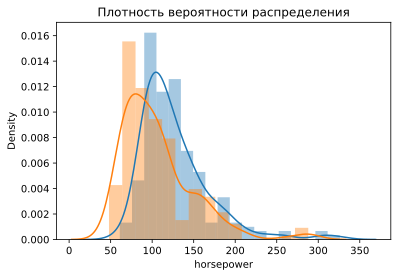

In [14]:
sns.distplot(df['engine-size'])
sns.distplot(df['horsepower'])
plt.title('Плотность вероятности распределения')
plt.show()

Действительно, на графике видно, что переменные статестически связаны друг с другом.

2. Нулевая гипотеза -- коэффициент сжатия статестически связан с пиковой частотой вращения.

In [11]:
print(sts.ttest_ind(df['compression-ratio'], df['peak-rpm']))

Ttest_indResult(statistic=-152.46116397057048, pvalue=0.0)


p-value = 0, гипотезу следует отвергнуть. 

Продемонстриурем результат визуально:

C:\Users\godof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\godof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


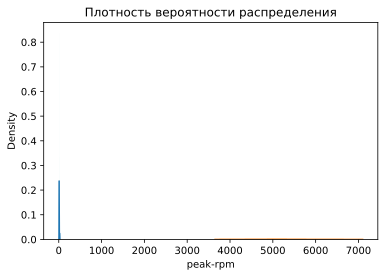

In [15]:
sns.distplot(df['compression-ratio'])
sns.distplot(df['peak-rpm'])
plt.title('Плотность вероятности распределения')
plt.show()

3. Нулевая гипотеза -- пиковая частота вращения статестичеки связан с рамзером двигателя.

In [12]:
print(sts.ttest_ind(df['engine-size'], df['peak-rpm']))

Ttest_indResult(statistic=-148.43477556156063, pvalue=0.0)


In [ ]:
p-value = 0, гипотезу следует отвергнуть. 

Продемонстрируем результат визуально: 

C:\Users\godof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\godof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


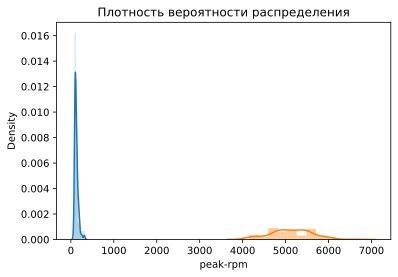

In [16]:
sns.distplot(df['engine-size'])
sns.distplot(df['peak-rpm'])
plt.title('Плотность вероятности распределения')
plt.show()